In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [23]:
f1 = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/AODSkimmer/test_output.root"
t1 = uproot.open(f1)['ntuples/outT']
ph_et = ak.flatten(t1['Photon_et'].array()).to_numpy()
ph_et 

array([57.1221    , -2.365874  ,  0.9069322 , ..., 14.59915   ,
       -1.2534449 ,  0.15171765], dtype=float32)

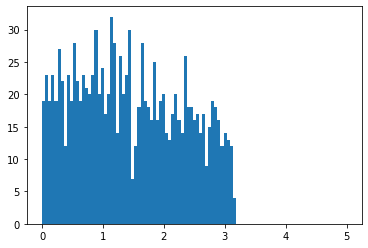

In [24]:
test = plt.hist(ph_et,bins=np.linspace(0,5,100))

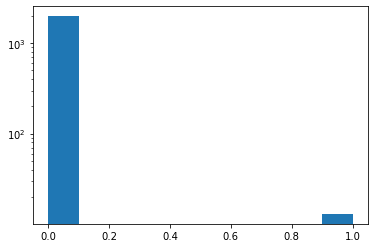

In [26]:
nEEcand = t1['nEECand'].array()
hist = plt.hist(nEEcand)
plt.yscale('log')